In [1]:
from keras.datasets import reuters
import numpy as np
import matplotlib as plt
from keras.utils import to_categorical

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

C:\Users\Christian\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
print("Number of data sets: " + str(len(train_labels)))
print("Label of first data set: " + str(train_labels[0]))
print("Data of first data set:\n" + str(train_data[0]))

Number of data sets: 8982
Label of first data set: 3
Data of first data set:
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [3]:
# General statistics of train data
lengths = [len(x) for x in train_data]
print("min:  " + str(np.min(lengths)))
print("max:  " + str(np.max(lengths)))
print("mean: " + str(np.mean(lengths)))
print("std:  " + str(np.std(lengths)))

min:  13
max:  2376
mean: 145.5398574927633
std:  145.81413013409278


In [4]:
# One-hot-encoding
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

print("min:  " + str(np.min(train_labels)))
print("max:  " + str(np.max(train_labels)))
print("All labels: " + str(np.unique(train_labels)))
print("\nFirst label (not encoded): " + str(train_labels[0]))
print("First label (one-hot-encoded):" + str(train_labels_cat[0]))

min:  0
max:  45
All labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]

First label (not encoded): 3
First label (one-hot-encoded):[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
word_index = reuters.get_word_index
word_index_dict = word_index()
      
label = train_labels[0]
review = train_data[0]
reverse_word_index = dict([(value, key) for (key, value) in word_index_dict.items()])
decoded_review = " ".join(
    [reverse_word_index.get(index - 3, "?") for index in review]
)
print("Label of first data set: " + str(label))
print("\nEncoded data:\n" + str(review))
print("\nDecoded data:\n" + decoded_review)

Label of first data set: 3

Encoded data:
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]

Decoded data:
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [6]:
# Vectorize data such that it fits the model
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.0
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train[0])
print(x_train[0].shape)
print(x_train.shape)

[0. 1. 1. ... 0. 0. 0.]
(10000,)
(8982, 10000)


In [7]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(
    500, 
    activation="relu", 
    input_shape=(10000, )))
model.add(layers.Dense(500, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))        # we use activation="softmax" when it's more than two categories,
                                                        # for binary we use activation="sigmoid"

model.summary()                                         # non-trainable parameters are frozen (see later)

from keras import optimizers, losses, metrics           # this is an alternative how we could compile the model
model.compile(
    optimizer=optimizers.RMSprop(lr=0.001),             # lr = learning rate
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)

#model.compile(
#    optimizer="rmsprop",                                # this one uses RMSprop with default values
#    loss="categorical_crossentropy",
#    metrics=["accuracy"]                                 # this gets replaced automatically with "binary_accuracy" internally
#)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               5000500   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 46)                23046     
Total params: 5,274,046
Trainable params: 5,274,046
Non-trainable params: 0
_________________________________________________________________


In [8]:
x_val = x_train[:2000]
partial_x_train = x_train[2000:]
y_val = train_labels_cat[:2000]
partial_y_train = train_labels_cat[2000:]

In [9]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=3,
    batch_size=512,
    validation_data=(x_val,y_val)
)

Train on 6982 samples, validate on 2000 samples
Epoch 1/3
6982/6982 [==============================] - 7s 968us/step - loss: 1.9576 - categorical_accuracy: 0.5689 - val_loss: 1.2946 - val_categorical_accuracy: 0.7185
Epoch 2/3
6982/6982 [==============================] - 5s 774us/step - loss: 0.8791 - categorical_accuracy: 0.8022 - val_loss: 1.2180 - val_categorical_accuracy: 0.7305
Epoch 3/3
6982/6982 [==============================] - 5s 755us/step - loss: 0.5319 - categorical_accuracy: 0.8794 - val_loss: 0.9459 - val_categorical_accuracy: 0.7955


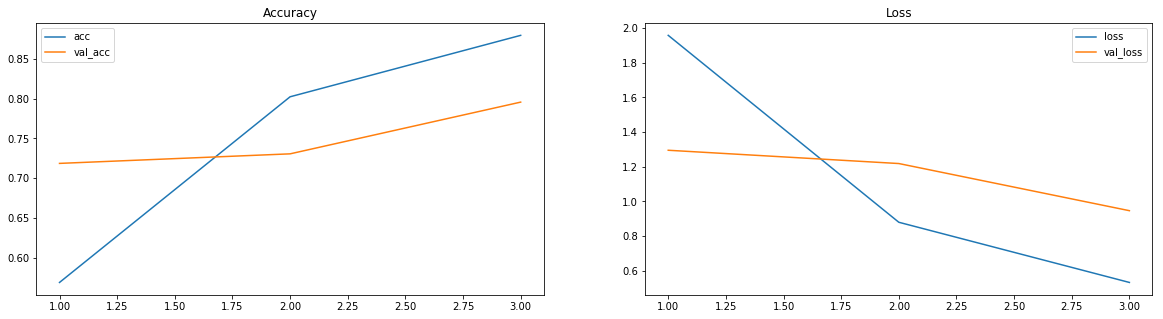

In [13]:
import matplotlib.pyplot as plt

r = range(1, len(history.history["categorical_accuracy"]) + 1)

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(r, history.history["categorical_accuracy"], label="acc")
plt.plot(r, history.history["val_categorical_accuracy"], label="val_acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(r, history.history["loss"], label="loss")
plt.plot(r, history.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss")

plt.show()
plt.close()

In [11]:
test_loss, test_acc = model.evaluate(x_test, test_labels_cat)

2246/2246 [==============================] - 1s 558us/step


In [12]:
print("Loss / Accuracy Evaluation")
print("--------------------------")
print("Loss:     " + str(round(test_loss,5)))
print("Accuracy: " + str(round(test_acc,2)))

Loss / Accuracy Evaluation
--------------------------
Loss:     0.95768
Accuracy: 0.79
